### Analizing the data to get insights from the data
*** Exploratory data analysis of the Data ***
    - This step will be done in the begining stage of the Project cycle
    - we can check Data types, 
    - Quantity of the data, 
    - we can visulize the data, 
    - understand relationship between the data columns
    - we can check also the outliers presence in the data
*** Based on this info we can further decide what action has to be made on the data ***


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print('lib import completed')

lib import completed


In [26]:
Data=pd.read_csv('FuelConsumption.csv')
Data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
Data.columns()

In [32]:
Data.head() # update columns 

,MAFYear,CarBrand,Variant,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [33]:
Data.keys() # column names acting as keys

Index(['MAFYear', 'CarBrand', 'Variant', 'VEHICLECLASS', 'ENGINESIZE',
       'CYLINDERS', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

### Model
- 4WD/4x4 = Four wheel drive
- AWD  = All wheel drive
- SWB  = Short Wheel Base
- LWB  = Long Wheel base
- EWB  = Extended Wheel base


## Transmission
A- Automatic
AM- Automated Manual
AS automatic with select shift
AV continously variable
M Manual
3-10 total no gears

### Fuel Type
x- Regular Gasoline
Z= Premium Gasoline
D= Diesel
E= Ethnol
N= Natural gas

FUEL consumption combined is 55% city 45 % high

In [ ]:
Data.info()

In [ ]:
Data.shape

In [ ]:
# check for null values
Data.isnull()
Data.isnull().sum()

In [ ]:
# check for duplicate values 
Data.duplicated().sum()

In [ ]:
# if in case duplicate values are present we can drop them
print(Data.info())
Data=Data.drop_duplicates()
#print(Data)
print(Data.info())


In [17]:
# we can get descriptive stastical inofrmation from describe method in pandas
Data.describe()
# it provides stastical info of numerical column

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [21]:
Data['MODEL'].value_counts()
# assignment get the count of vehicles with AWD
# with 4WD or 4x4


In [31]:
Data.columns # column names
New_columns={'MODELYEAR':'MAFYear', 'MAKE':'CarBrand', 'MODEL':'Variant'}
Data.rename(New_columns,axis='columns', inplace=True)

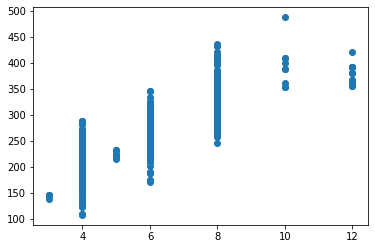

In [24]:
plt.scatter(Data['CYLINDERS'],Data['CO2EMISSIONS'])
plt.show()

In [34]:
# want to check different car brands available
Data.CarBrand

0              ACURA
1              ACURA
2              ACURA
3              ACURA
4              ACURA
5              ACURA
6              ACURA
7              ACURA
8              ACURA
9              ACURA
10             ACURA
11             ACURA
12      ASTON MARTIN
13      ASTON MARTIN
14      ASTON MARTIN
15      ASTON MARTIN
16      ASTON MARTIN
17      ASTON MARTIN
18      ASTON MARTIN
19              AUDI
20              AUDI
21              AUDI
22              AUDI
23              AUDI
24              AUDI
25              AUDI
26              AUDI
27              AUDI
28              AUDI
29              AUDI
            ...     
1037      VOLKSWAGEN
1038      VOLKSWAGEN
1039      VOLKSWAGEN
1040      VOLKSWAGEN
1041      VOLKSWAGEN
1042      VOLKSWAGEN
1043      VOLKSWAGEN
1044      VOLKSWAGEN
1045      VOLKSWAGEN
1046      VOLKSWAGEN
1047      VOLKSWAGEN
1048      VOLKSWAGEN
1049      VOLKSWAGEN
1050      VOLKSWAGEN
1051      VOLKSWAGEN
1052      VOLKSWAGEN
1053      VOL

In [35]:
Data.CarBrand.unique() # returns unique values in the columns

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [38]:
len(Data.CarBrand.unique()) # using this function we can get total no of samples


39

In [40]:
# let us check carbon dioxide emission based on brand, whcih can give us some insghs 
# like if any of the particular brand is producing more CO2 emission

DataXaxis=Data.CarBrand.value_counts()

In [ ]:
DataXaxis

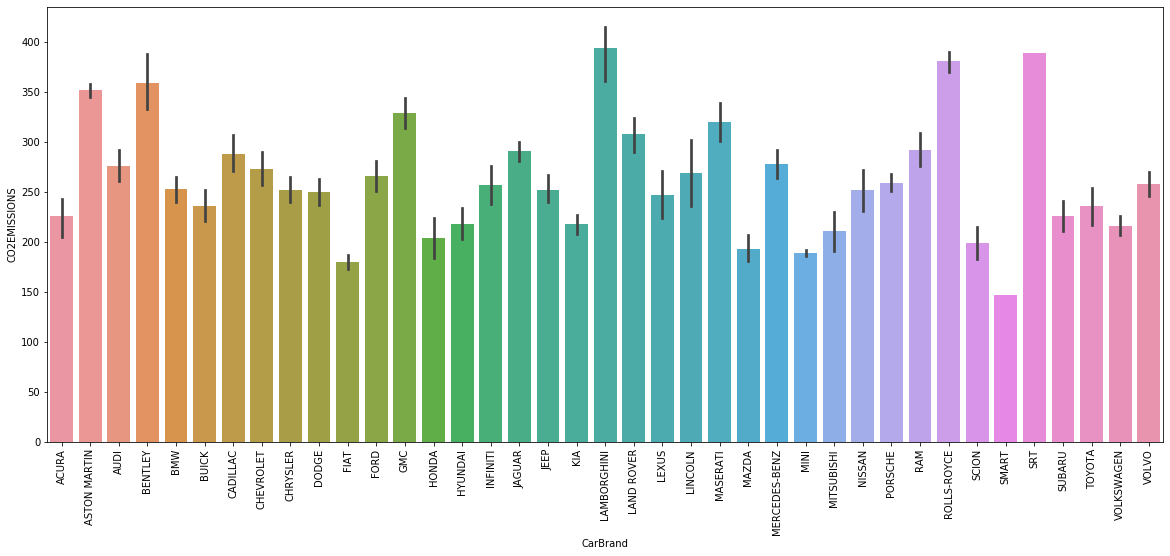

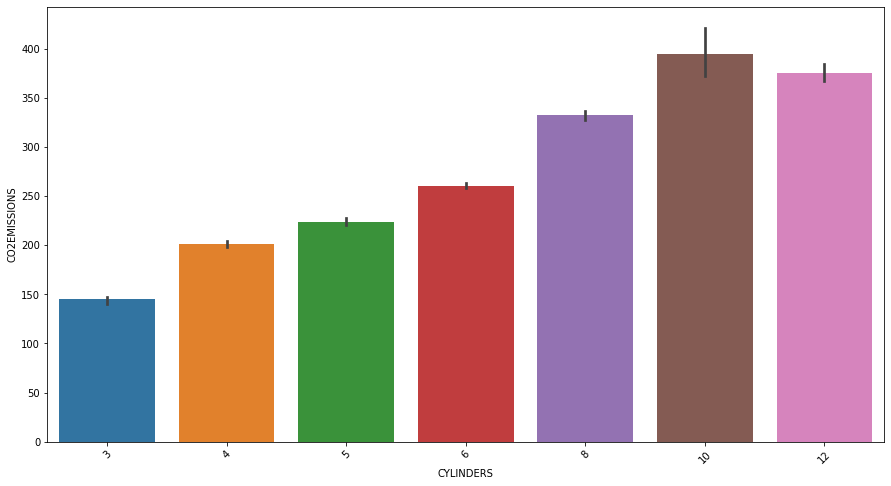

In [58]:
#using seaborn co2 and carbrnad
plt.subplots(figsize=(20,8))
sns.barplot(data=Data, x='CarBrand', y='CO2EMISSIONS')
plt.xticks(rotation=90)
plt.show()




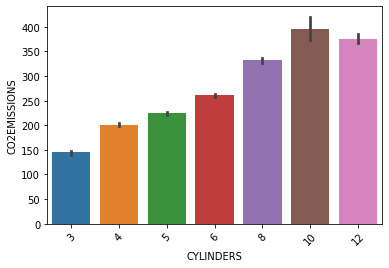

In [61]:
# plot Cylinders vs co2
plt.subplots(figsize=(6,4))
sns.barplot(data=Data,x='CYLINDERS',y='CO2EMISSIONS')
plt.xticks(rotation=45)
plt.show()
# plot eng size vs co2
# as the cylinders in the car increase co2 emission increase

In [60]:

DataXaxis=Data.CYLINDERS.value_counts()
DataXaxis

4     420
6     356
8     252
12     17
10      9
5       9
3       4
Name: CYLINDERS, dtype: int64

In [63]:

DataXaxis=Data.ENGINESIZE.value_counts()
len(DataXaxis)

45

In [6]:
# using seaborn co2 and enginesize
plt.subplots(figsize=(30,8))
sns.barplot(data=Data , x='ENGINESIZE',y='CO2EMISSIONS')
plt.xticks(rotation=90)
plt.show()

# as theEngine size increases there are chances of higher  co2 emission is more

NameError: name 'plt' is not defined

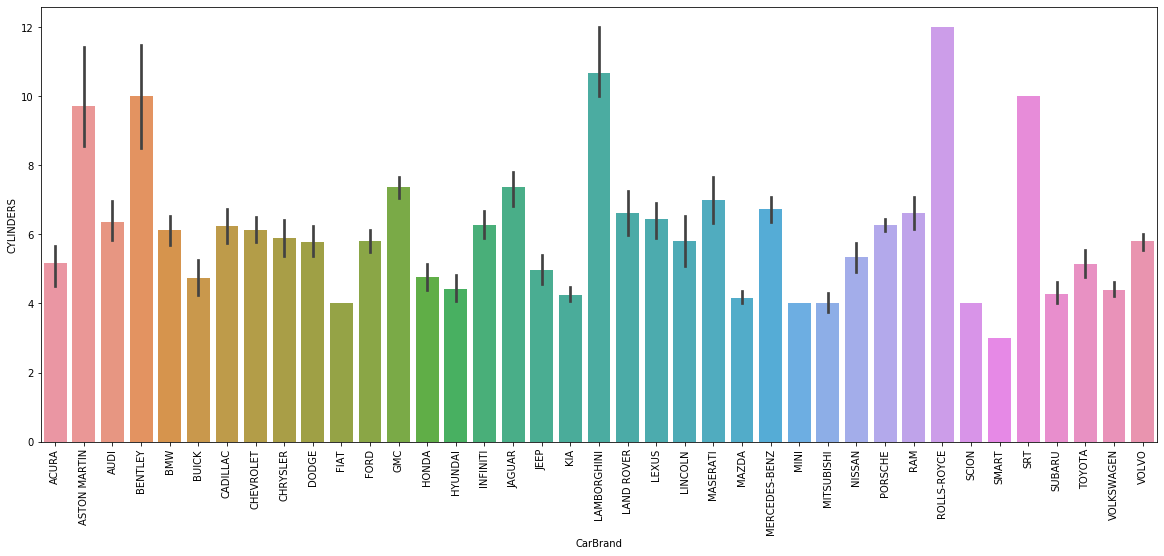

In [65]:
#using seaborn Cylinders and carbrnad
plt.subplots(figsize=(20,8))
sns.barplot(data=Data, x='CarBrand', y='CYLINDERS')
plt.xticks(rotation=90)
plt.show()
# amnufactures of cars with higher no cylinders

In [1]:
#using seaborn co2 and carbrnad
plt.subplots(figsize=(20,8))
sns.barplot(data=Data, x='CarBrand', y='CO2EMISSIONS')
plt.xticks(rotation=90)
plt.show()

#Cars manufacture/ car brands which produces cars with more no of cylinders produces more CO2

NameError: name 'plt' is not defined

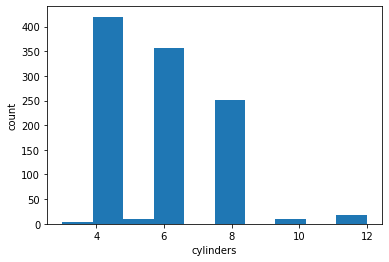

In [69]:
# distribution of cars with no of cylinders which will give us idea about the how many cars have a particular cylinder capacity
#with particular cylinder capacity how many cars are present in the given data
# Histrogram: distribution of the data along the particular axis
#sns.histogram
# no cylinders
plt.hist(x=Data.CYLINDERS)

plt.xlabel('cylinders')
plt.ylabel('count')
plt.show()

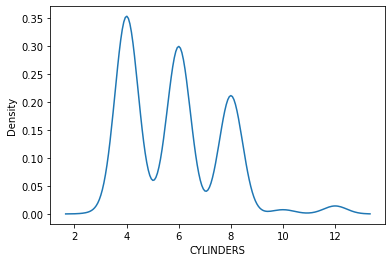

In [70]:
sns.kdeplot(Data.CYLINDERS) # kernel density estimation plot

In [71]:
# in the data rows do the check 
# using for loop and comparision with specific brand name


# assignment 'LAMB, RR, SMART FIAT plot only info about these brands

,MAFYear,CarBrand,Variant,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [77]:
# how filter the data
Benz=Data[Data.CarBrand=='MERCEDES-BENZ']
# we are trying to group the data according to variants
# pandas gives us group by method to helpout this condition
Benz_variants=Benz.groupby('Variant').count().sort_values('CarBrand')
Benz_variants 

,MAFYear,CarBrand,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
Variant,,,,,,,,,,,,
B 250,1,1,1,1,1,1,1,1,1,1,1,1
E 63 AMG 4MATIC WAGON,1,1,1,1,1,1,1,1,1,1,1,1
E 63 AMG S 4MATIC,1,1,1,1,1,1,1,1,1,1,1,1
E 63 AMG S 4MATIC WAGON,1,1,1,1,1,1,1,1,1,1,1,1
G 550,1,1,1,1,1,1,1,1,1,1,1,1
G 63 AMG,1,1,1,1,1,1,1,1,1,1,1,1
GL 350 BLUETEC 4MATIC,1,1,1,1,1,1,1,1,1,1,1,1
GL 450 4MATIC,1,1,1,1,1,1,1,1,1,1,1,1
GL 550 4MATIC,1,1,1,1,1,1,1,1,1,1,1,1


In [78]:
Benz=Data[Data.CarBrand=='MERCEDES-BENZ']
# we are trying to group the data according to variants
# pandas gives us group by method to helpout this condition
Benz_variants=Benz.groupby('Variant').count().reset_index().sort_values('CarBrand')
Benz_variants 

,Variant,MAFYear,CarBrand,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,B 250,1,1,1,1,1,1,1,1,1,1,1,1
29,E 63 AMG 4MATIC WAGON,1,1,1,1,1,1,1,1,1,1,1,1
30,E 63 AMG S 4MATIC,1,1,1,1,1,1,1,1,1,1,1,1
31,E 63 AMG S 4MATIC WAGON,1,1,1,1,1,1,1,1,1,1,1,1
32,G 550,1,1,1,1,1,1,1,1,1,1,1,1
33,G 63 AMG,1,1,1,1,1,1,1,1,1,1,1,1
34,GL 350 BLUETEC 4MATIC,1,1,1,1,1,1,1,1,1,1,1,1
35,GL 450 4MATIC,1,1,1,1,1,1,1,1,1,1,1,1
36,GL 550 4MATIC,1,1,1,1,1,1,1,1,1,1,1,1
37,GL 63 AMG,1,1,1,1,1,1,1,1,1,1,1,1


In [3]:
input()

45


'45'

In [5]:
45

45